In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
wine_df = pd.read_csv('wine_data.csv')
wine_df

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0
...,...,...
173,1.74,740.0
174,1.56,750.0
175,1.56,835.0
176,1.62,840.0


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   OD_read  178 non-null    float64
 1   Proline  178 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


### 와인데이터 시각화

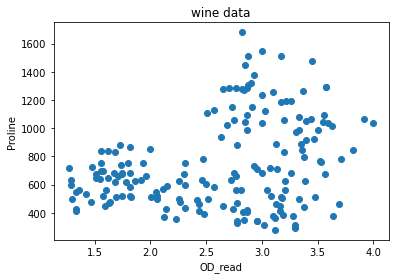

In [6]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1])
plt.title('wine data')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

### K-Means

In [7]:
#3개 군집으로 나누기
km = KMeans(3)
km_clusters = km.fit_predict(wine_df)

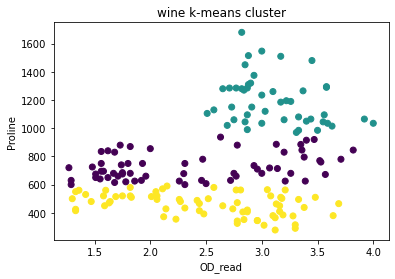

In [10]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=km_clusters)
plt.title('wine k-means cluster')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

### 계층적 군집분석

In [15]:
ac = AgglomerativeClustering(3, linkage='ward')
ac_clusters = ac.fit_predict(wine_df)

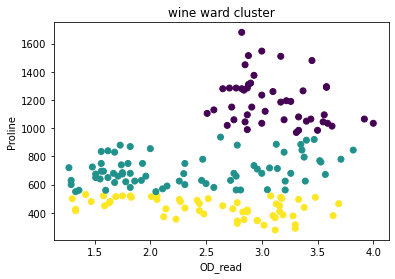

In [16]:
plt.scatter(wine_df.values[:,0], wine_df.values[:,1], c=ac_clusters)
plt.title('wine ward cluster')
plt.xlabel('OD_read')
plt.ylabel('Proline')
plt.show()

In [17]:
print('Shillhouette score\n')
print('k-means :', silhouette_score(wine_df, km_clusters))
print('ward :', silhouette_score(wine_df, ac_clusters))

Shillhouette score

k-means : 0.5809421087616886
ward : 0.5651908644787632


#### 실루엣 점수
- 1 ~ -1까지 점수가 나옴
- 클러스터를 완벽하게 분류했을 때 : 1, 클러스터가 별로일때: 낮은 값
- 얼마나 클러스터가 잘 군집이 형성됐는지 수치로 나타내주는 지표

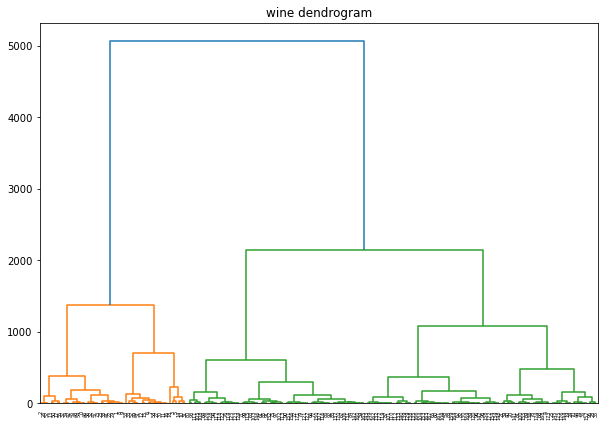

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title('wine dendrogram')
d = dendrogram(linkage(wine_df, method='ward'))

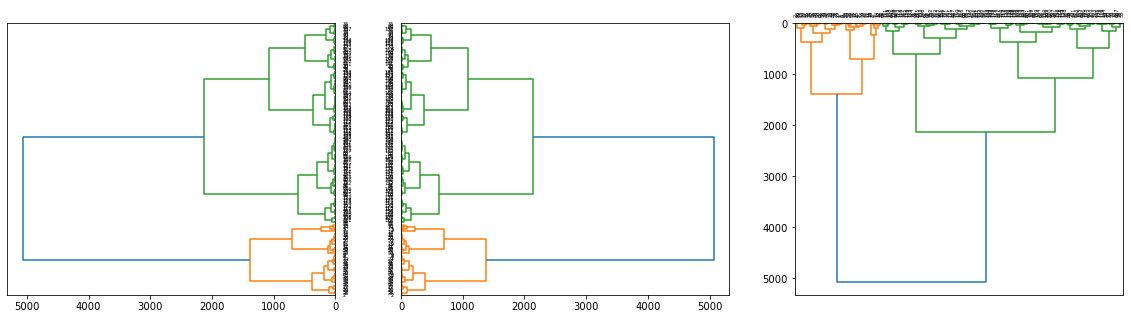

In [19]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
d1 = dendrogram(linkage(wine_df, method='ward'), orientation='left')

ax2 = fig.add_subplot(1,3,2)
d2 = dendrogram(linkage(wine_df, method='ward'), orientation='right')

ax3 = fig.add_subplot(1,3,3)
d3 = dendrogram(linkage(wine_df, method='ward'), orientation='bottom')